In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import os
import sys
sys.path.append('../')
from package_global_functions import *


def powerLaw(x,a,b):
    return b*x**a

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_some_params_rework/results'
else:
    path = '/results'

In [4]:
Nsites = 2
N = 10000
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0

df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')

### Different system sizes, q1=7, q2=10, pis=0

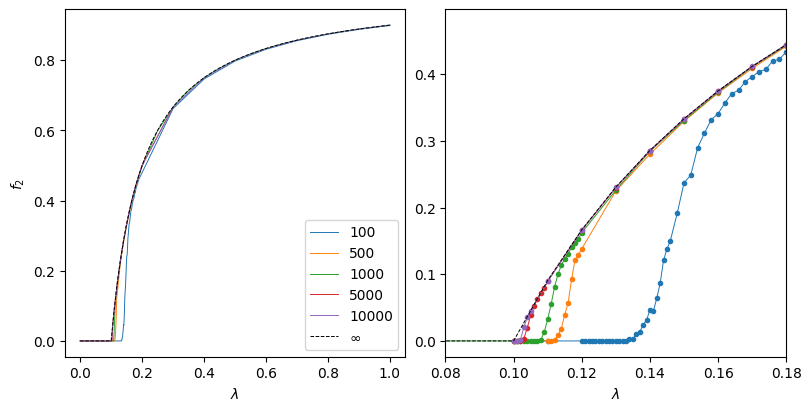

In [67]:
pi1, pi2 = 0.0, 0.0
# q1, q2 = 7.0, 10.0
q1, q2 = 10.0, 10.0

fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
# fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
# for N in [100, 500, 1000, 5000, 10000]:
for N in [5000,]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    ax[0].plot(df['l'], df['f2'], label=f'{N}', lw=0.7)
    df = df.query('l >= 0.05 & l <0.2')
    ax[1].plot(df['l'], df['f2'], label=f'{N}', lw=0.7, marker='.')
    # df = df.query('l >= 0.1 & l <0.2')
    # df['lmod'] = (df['l']-0.1)*100
    # ax[2].plot(df['lmod'], df['f2'], label=f'{N}', lw=0.7, marker='.')

# results from the deterministic equations
df = pd.read_csv(extSSDpath + getProjectFoldername() + f'/det_sols_from_polynomial/res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
ax[0].plot(df['l'], df['f2'], lw=0.7, color='xkcd:black', ls='--', label=r'$\infty$')
df = df.query('l >= 0.05 & l <0.2')
ax[1].plot(df['l'], df['f2'], label=f'{N}', lw=0.7, color='xkcd:black', ls='--')
ax[1].set_xlim(0.08, 0.18)
# ax[2].set_xlim(0.0, 0.1)
ax[0].set_xlabel(r'$\lambda$')
ax[1].set_xlabel(r'$\lambda$')
ax[0].set_ylabel(r'$f_2$')
ax[0].legend()
fig.savefig(f'sim_at_pis_0_difN_q1_{q1}_q2_{q2}.png')

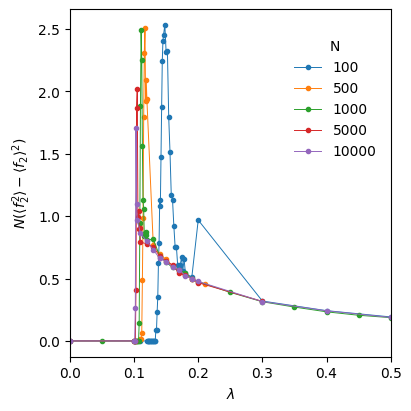

In [5]:
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0
Nsites = 2

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

for N in [100, 500, 1000, 5000, 10000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    df['susc'] = N*df['sdf2']**2
    # ax.plot(df['l'], df['sdf2'], label=f'{N}', lw=0.7, marker='.')
    ax.plot(df['l'], df['susc'], label=f'{N}', lw=0.7, marker='.')
fig.legend(title='N', frameon=False, loc = (0.7, 0.6))
# ax.set(xlabel='$\lambda$', ylabel=r'$\sigma_{f_2}$', xlim=(0.0,0.5))
ax.set(xlabel='$\lambda$', ylabel=r'$N(\langle f_2^{2} \rangle - \langle f_2 \rangle^{2})$', xlim=(0.0,0.5))
# fig.savefig(f'sim_at_pis_0_difN_sigf2_q1_{q1}_q2_{q2}.png')
fig.savefig(f'sim_at_pis_0_difN_suscf2_q1_{q1}_q2_{q2}.png')

0.1013


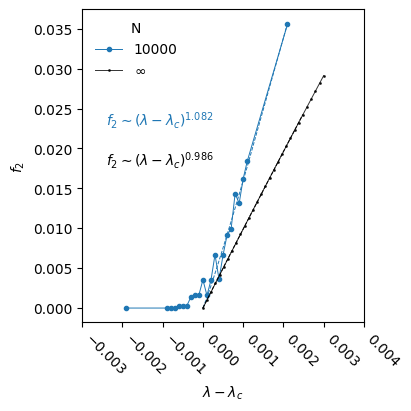

In [43]:
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0
Nsites = 2

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
for N in [10000, ]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    df = df.query('l >= 0.09 & l <0.105')
    dfaux = df.query('f2 > 0')
    lc = float(dfaux['l'].iloc[0])
    print(lc)
    lc = 0.1019
    # df['ln'] = (df['l'] - lc)/df['l']
    # df['ln'] = (df['l'] - lc)/lc
    df['ln'] = (df['l']) - lc
    dfaux = df.query('l >= @lc & l < 0.105')
    popt, _ = curve_fit(powerLaw, dfaux['ln'], dfaux['f2'])
    # ax.plot(df['ln'], df['f2'], label=f'{N}', lw=0.7, marker='.')
    line, = ax.plot(df['ln'], df['f2'], label=f'{N}', ls=None, lw=0.7, marker='.')
    ax.plot(dfaux['ln'], popt[1]*dfaux['ln']**popt[0], color=line.get_color(), ls='--', lw=0.7)
    fig.text(0.25, 0.7, rf'$f_2 \sim (\lambda-\lambda_c)^{{{round(popt[0],3)}}}$', color=line.get_color())


# results from the deterministic equations
df = pd.read_csv(extSSDpath + getProjectFoldername() + f'/det_sols_from_polynomial/res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_around_trans.csv')
df = df.query('l >= 0.05 & l < 0.15')
# df['ln'] = (df['l'] - 0.1)/df['l']
df['ln'] = df['l'] - 0.1
# df['ln'] = (df['l'] - 0.1)/0.1
ax.plot(df['ln'], df['f2'], lw=0.7, color='xkcd:black', ls=None, marker='.', markersize=2, label=r'$\infty$', alpha=0.8)
dfaux = df.query('l >= 0.1 & l <= 0.1025')
popt, _ = curve_fit(powerLaw, dfaux['ln'], dfaux['f2'])
ax.plot(dfaux['ln'], popt[1]*dfaux['ln']**popt[0], color='xkcd:black', ls='--', lw=0.7)
# print(popt)
fig.text(0.25, 0.6, rf'$f_2 \sim (\lambda-\lambda_c)^{{{round(popt[0],3)}}}$', color='xkcd:black')
# ax.set_xlim(0.08, 0.18)
# ax.set_xlabel(r'($\lambda - \lambda_c)/\lambda$')
ax.set_xlabel(r'$\lambda - \lambda_c$')
ax.set_ylabel(r'$f_2$')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=-45, ha='left')
# ax.set(xscale='symlog', yscale='symlog')
ax.legend(title='N', frameon=False)

# fig.savefig(f'phaste_transiton_exponents_pis_0_q1_{q1}_q2_{q2}.png')

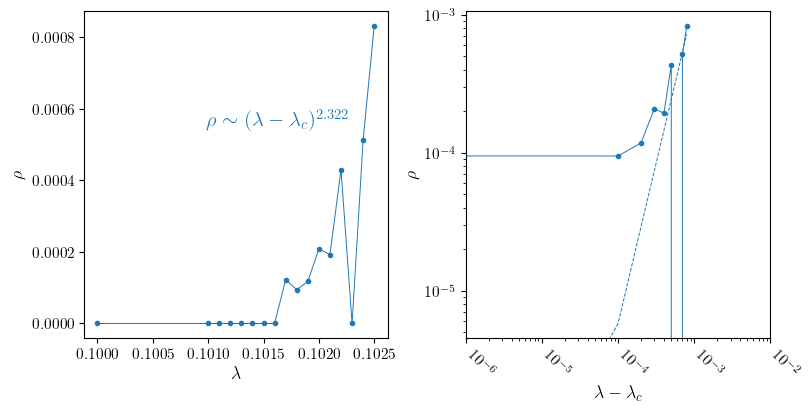

In [20]:
pi1, pi2 = 0.0, 0.0
q1, q2 = 10.0, 10.0
Nsites = 2

fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\lambda$', ylabel=r'$\rho$')
ax[1].set(xlabel=r'$\lambda - \lambda_c$', ylabel=r'$\rho$', xscale='log', yscale='log')
for N in [5000, ]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N & l <= 0.1025 & l >= 0.1')
    df['rho'] = 1 - df['f0']
    ax[0].plot(df['l'], df['rho'], label=f'{N}', ls=None, lw=0.7, marker='.')
    estimate_lc = 0.1017
    df['lminlc'] = df['l'] - estimate_lc
    df = df.query('lminlc >= 0 & lminlc <= 1e-3')
    popt, _ = curve_fit(powerLaw, df['lminlc'], df['rho'])
    # ax.plot(df['ln'], df['f2'], label=f'{N}', lw=0.7, marker='.')
    line, = ax[1].plot(df['lminlc'], df['rho'], label=f'{N}', ls=None, lw=0.7, marker='.')
    ax[1].plot(df['lminlc'], popt[1]*df['lminlc']**popt[0], color=line.get_color(), ls='--', lw=0.7)
    fig.text(0.25, 0.7, rf'$\rho \sim (\lambda-\lambda_c)^{{{round(popt[0],3)}}}$', color=line.get_color())


# results from the deterministic equations
# df = pd.read_csv(extSSDpath + getProjectFoldername() + f'/det_sols_from_polynomial/res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_around_trans.csv')
# df = df.query('l >= 0.05 & l < 0.15')
# df['rho'] = 1 - df['f0']
# # df['ln'] = (df['l'] - 0.1)/df['l']
# df['ln'] = df['l'] - 0.1
# # df['ln'] = (df['l'] - 0.1)/0.1
# ax.plot(df['ln'], df['f2'], lw=0.7, color='xkcd:black', ls=None, marker='.', markersize=2, label=r'$\infty$', alpha=0.8)
# dfaux = df.query('l >= 0.1 & l <= 0.1025')
# popt, _ = curve_fit(powerLaw, dfaux['ln'], dfaux['rho'])
# ax.plot(dfaux['ln'], popt[1]*dfaux['ln']**popt[0], color='xkcd:black', ls='--', lw=0.7)
# # print(popt)
# fig.text(0.25, 0.6, rf'$\rho \sim (\lambda-\lambda_c)^{{{round(popt[0],3)}}}$', color='xkcd:black')

ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=-45, ha='left')
# ax.set(xscale='symlog', yscale='symlog')
# ax.legend(title='N', frameon=False)

In [17]:
df

,N,pi1,pi2,q1,q2,l,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,Nrea,simTime,ic,rho,lminlc
254,5000.0,0.0,0.0,10.0,10.0,0.1019,0.999883,0.000117,0.000000,0.001400,0.001400,0.000000,-0.000235,0.002800,200.0,11000.0,E,0.000117,0.0000
256,5000.0,0.0,0.0,10.0,10.0,0.1020,0.999792,0.000128,0.000081,0.002298,0.001932,0.001253,-0.000175,0.004066,200.0,11000.0,E,0.000208,0.0001
257,5000.0,0.0,0.0,10.0,10.0,0.1021,0.999807,0.000193,0.000000,0.002164,0.002164,0.000000,-0.000386,0.004329,200.0,11000.0,E,0.000193,0.0002
258,5000.0,0.0,0.0,10.0,10.0,0.1022,0.999570,0.000137,0.000293,0.003458,0.001980,0.002849,0.000019,0.004895,200.0,11000.0,E,0.000430,0.0003
259,5000.0,0.0,0.0,10.0,10.0,0.1023,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.0,11000.0,E,0.000000,0.0004
260,5000.0,0.0,0.0,10.0,10.0,0.1024,0.999486,0.000144,0.000370,0.003704,0.002120,0.003055,0.000082,0.005245,200.0,11000.0,E,0.000514,0.0005
261,5000.0,0.0,0.0,10.0,10.0,0.1025,0.999167,0.000713,0.000120,0.004340,0.004151,0.001331,-0.001306,0.008429,200.0,11000.0,E,0.000833,0.0006
262,5000.0,0.0,0.0,10.0,10.0,0.1026,0.998518,0.000489,0.000992,0.006314,0.003501,0.005346,0.000013,0.008919,50.0,11000.0,E,0.001482,0.0007
263,5000.0,0.0,0.0,10.0,10.0,0.1027,0.998154,0.001449,0.000397,0.007972,0.007444,0.003047,-0.002500,0.015272,50.0,11000.0,E,0.001846,0.0008
264,5000.0,0.0,0.0,10.0,10.0,0.1028,0.999428,0.000000,0.000572,0.003944,0.000000,0.003944,0.000572,0.003944,50.0,11000.0,E,0.000572,0.0009


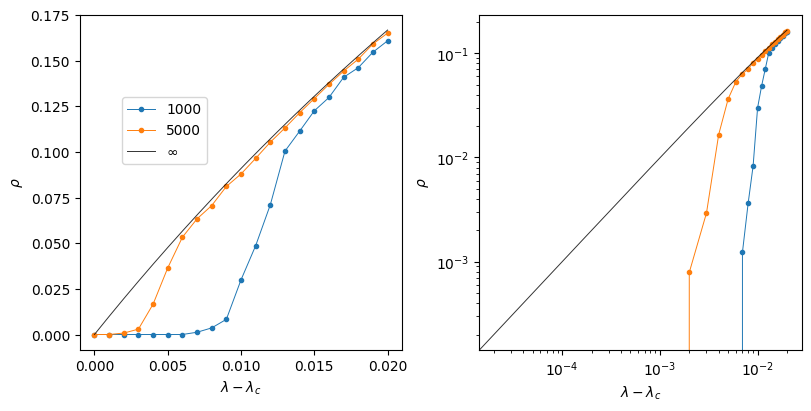

In [11]:
pi1, pi2 = 0.0, 0.0
q1, q2 = 10.0, 10.0
r = 1/q2
Nsites = 2

# fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\lambda - \lambda_c^{MF}$', ylabel=r'$\rho$')
ax[1].set(xlabel=r'$\lambda - \lambda_c^{MF}$', ylabel=r'$\rho$', xscale='log', yscale='log')

#approx lambda c for 5000: 0.1019

ls_coarse = list(np.around(np.arange(0.1, 0.12+0.001, 0.001),3))
for N in [1000, 5000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N & l in @ls_coarse')
    df['rho'] = 1 - df['f0']
    df['lminlc'] = df['l'] - r
    df = df.query('lminlc >= 0')
    ax[0].plot(df['lminlc'], df['rho'], label=f'{N}', ls=None, lw=0.7, marker='.')
    ax[1].plot(df['lminlc'], df['rho'], ls=None, lw=0.7, marker='.')

# analytical solution:
f0, rho = [], []
ls = np.linspace(r, max(df['l']), 1000)
for l in ls:
    if l <= r:
        f0.append(1.0), rho.append(0.0)
    else:
        f0.append(r/l), rho.append(1-r/l)
lsminlc = ls - r
ax[0].plot(lsminlc, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, label=r'$\infty$', alpha=0.8)
ax[1].plot(lsminlc, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, alpha=0.8)

fig.legend(loc = (0.15, 0.6))

[0.99994373 9.99258637]


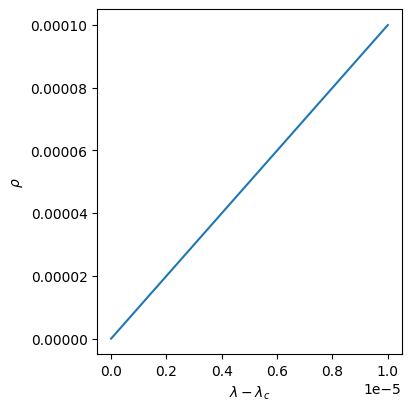

In [3]:
ls = np.linspace(r, r+1e-5, 1000)
rho = []
for l in ls:
    if l <= r:
        rho.append(0.0)
    else:
        rho.append(1-r/l)
lsminlc = ls - r

popt, _ = curve_fit(powerLaw, lsminlc, rho)
print(popt)

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel='$\lambda - \lambda_c$', ylabel=r'$\rho$')
ax.plot(lsminlc, rho)

## Figure for the paper

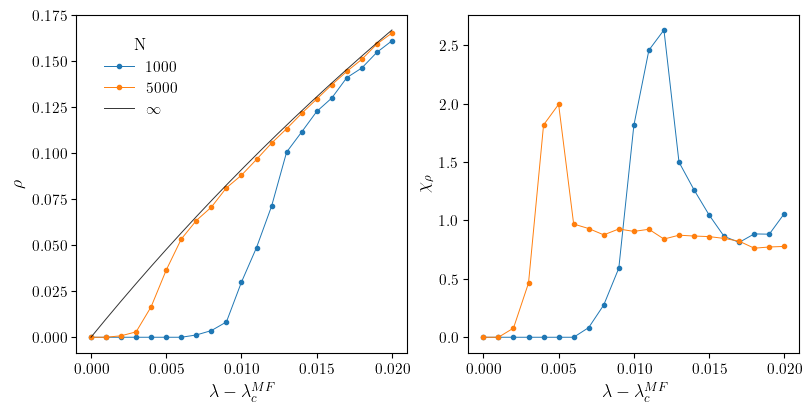

In [14]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

pi1, pi2 = 0.0, 0.0
q1, q2 = 10.0, 10.0
r = 1/q2
Nsites = 2

# fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\lambda - \lambda_c^{MF}$', ylabel=r'$\rho$')
ax[1].set(xlabel=r'$\lambda - \lambda_c^{MF}$', ylabel=r'$\chi_{\rho}$')

#approx lambda c for 5000: 0.1019

ls_coarse = list(np.around(np.arange(0.1, 0.12+0.001, 0.001),3))
for N in [1000, 5000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N & l in @ls_coarse')
    df['rho'] = 1 - df['f0']
    df['lminlc'] = df['l'] - r
    df['susc'] = N*df['sdf0']**2
    df = df.query('lminlc >= 0')
    ax[0].plot(df['lminlc'], df['rho'], label=f'{N}', ls=None, lw=0.7, marker='.')
    ax[1].plot(df['lminlc'], df['susc'], ls=None, lw=0.7, marker='.')

# analytical solution:
f0, rho = [], []
ls = np.linspace(r, max(df['l']), 1000)
for l in ls:
    if l <= r:
        f0.append(1.0), rho.append(0.0)
    else:
        f0.append(r/l), rho.append(1-r/l)
lsminlc = ls - r
ax[0].plot(lsminlc, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, label=r'$\infty$', alpha=0.8)
# ax[1].plot(lsminlc, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, alpha=0.8)

fig.legend(loc = (0.12, 0.7), title='N', fontsize=11, title_fontsize=12, frameon=False)

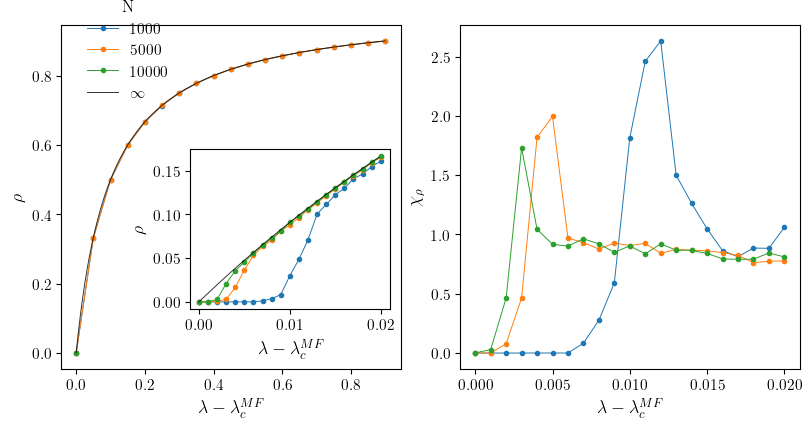

In [40]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

pi1, pi2 = 0.0, 0.0
q1, q2 = 10.0, 10.0
r = 1/q2
Nsites = 2

# fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\lambda - \lambda_c^{MF}$', ylabel=r'$\rho$')
ax[1].set(xlabel=r'$\lambda - \lambda_c^{MF}$', ylabel=r'$\chi_{\rho}$')
left, bottom, width, height = [0.23, 0.28, 0.25, 0.4]
ax_inset = fig.add_axes([left, bottom, width, height])
ax_inset.set(xlabel=r'$\lambda - \lambda_c^{MF}$', ylabel=r'$\rho$')

#approx lambda c for 5000: 0.1019

ls_coarse = list(np.around(np.arange(0.0, 1.0+0.05, 0.05), 2))
ls_coarse_close = list(np.around(np.arange(0.1, 0.12+0.001, 0.001),3))

for N in [1000, 5000, 10000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df['rho'] = 1 - df['f0']
    df['susc'] = N*df['sdf0']**2
    df['lminlc'] = df['l'] - r
    df_ls_coarse = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N & l in @ls_coarse')
    df_ls_coarse_close = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N & l in @ls_coarse_close')
    df_ls_coarse_close = df_ls_coarse_close.query('lminlc >= 0')
    ax[0].plot(df_ls_coarse['lminlc'], df_ls_coarse['rho'], label=f'{N}', ls=None, lw=0.7, marker='.')
    ax_inset.plot(df_ls_coarse_close['lminlc'], df_ls_coarse_close['rho'], ls=None, lw=0.7, marker='.')
    ax[1].plot(df_ls_coarse_close['lminlc'], df_ls_coarse_close['susc'], ls=None, lw=0.7, marker='.')

# analytical solution:
f0, rho = [], []
ls = np.linspace(r, 1.0, 1000)
for l in ls:
    if l <= r:
        f0.append(1.0), rho.append(0.0)
    else:
        f0.append(r/l), rho.append(1-r/l)
lsminlc = ls - r
rho = np.array(rho)
ax[0].plot(lsminlc, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, label=r'$\infty$', alpha=0.8)
rho = rho[lsminlc <= 0.02]
lsminlc = lsminlc[lsminlc <= 0.02]
ax_inset.plot(lsminlc, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, alpha=0.8)
# ax[1].plot(lsminlc, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, alpha=0.8)

fig.legend(loc = (0.1, 0.75), title='N', fontsize=11, title_fontsize=12, frameon=False)

fig.savefig('rho_and_susc_w_inset_mean_field_and_sim.pdf')

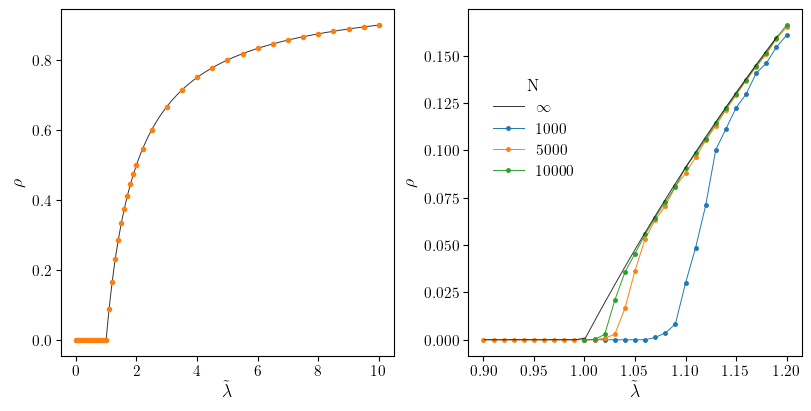

In [14]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

pi1, pi2 = 0.0, 0.0
q1, q2 = 10.0, 10.0
r = 1/q2
Nsites = 2

# fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\tilde{\lambda}$', ylabel=r'$\rho$')
ax[1].set(xlabel=r'$\tilde{\lambda}$', ylabel=r'$\rho$')

#approx lambda c for 5000: 0.1019

ls_coarse = list(np.around(np.arange(0.0, 0.2+0.01, 0.01), 2)) + [0.22,] + list(np.around(np.arange(0.25,1.0+0.05,0.05),2))
ls_coarse_close = list(np.around(np.arange(0.09, 0.12+0.001, 0.001),3))

for N in [1000, 5000, 10000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df['rho'] = 1 - df['f0']
    df['lminlc'] = df['l'] - r
    df['ltilde'] = df['l']/r
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    df_ls_coarse_close = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N & l in @ls_coarse_close')
    # df_ls_coarse_close = df_ls_coarse_close.query('lminlc >= 0')
    ln, = ax[1].plot(df_ls_coarse_close['ltilde'], df_ls_coarse_close['rho'], label=f'{N}', lw=0.7, marker='.', markersize=5)
    if N == 5000:
        df_ls_coarse = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N & l in @ls_coarse')
        ax[0].plot(df_ls_coarse['ltilde'], df_ls_coarse['rho'], lw=0.0, marker='.', color= ln.get_color(), zorder=2)

# analytical solution:
f0, rho = [], []
ls = np.linspace(0.0, 1.0, 1000)
for l in ls:
    if l <= r:
        f0.append(1.0), rho.append(0.0)
    else:
        f0.append(r/l), rho.append(1-r/l)
# lsminlc = ls - r
rho = np.array(rho)
ls_tilde = ls/r
ax[0].plot(ls_tilde, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, label=r'$\infty$', alpha=0.8, zorder=1)
# rho = rho[lsminlc <= 0.02]
# lsminlc = lsminlc[lsminlc <= 0.02]
rho = rho[(ls <= 0.12) & (ls >= 0.09)]
ls = ls[(ls <= 0.12) & (ls >= 0.09)]
ls_tilde = ls/r
ax[1].plot(ls_tilde, rho, lw=0.7, color='xkcd:black', ls=None, marker=None, alpha=0.8)

fig.legend(loc = (0.6, 0.55), title='N', fontsize=11, title_fontsize=12, frameon=False)

fig.savefig('rho_mean_field_and_sim.pdf')

In [21]:
df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
N = 5000
ls_coarse = list(np.around(np.arange(0.0, 1.0+0.01, 0.01), 2))
df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N & l in @ls_coarse')

In [22]:
# list(df.l)
df

,N,pi1,pi2,q1,q2,l,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,Nrea,simTime,ic
223,5000.0,0.0,0.0,10.0,10.0,0.09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,11000.0,E
234,5000.0,0.0,0.0,10.0,10.0,0.10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,11000.0,E
272,5000.0,0.0,0.0,10.0,10.0,0.11,0.912121,0.049306,0.038572,0.013465,0.044765,0.044429,-0.060041,0.132600,50.0,11000.0,E
283,5000.0,0.0,0.0,10.0,10.0,0.12,0.835001,0.083623,0.081377,0.012472,0.080861,0.080820,-0.085869,0.241900,50.0,11000.0,E
287,5000.0,0.0,0.0,10.0,10.0,0.15,0.667082,0.161127,0.171791,0.011177,0.137757,0.137682,-0.150462,0.412894,100.0,11000.0,E
293,5000.0,0.0,0.0,10.0,10.0,0.20,0.499938,0.253155,0.246906,0.009787,0.192333,0.192118,-0.259404,0.576618,100.0,11000.0,E
294,5000.0,0.0,0.0,10.0,10.0,0.25,0.400197,0.325942,0.273861,0.008784,0.207142,0.207199,-0.378023,0.621359,100.0,11000.0,E
296,5000.0,0.0,0.0,10.0,10.0,0.30,0.333366,0.321098,0.345536,0.007930,0.232499,0.232353,-0.296659,0.697260,100.0,11000.0,E
297,5000.0,0.0,0.0,10.0,10.0,0.35,0.285919,0.323912,0.390169,0.007311,0.232748,0.232780,-0.257656,0.698199,100.0,11000.0,E
298,5000.0,0.0,0.0,10.0,10.0,0.40,0.249919,0.393007,0.357074,0.006860,0.241648,0.241675,-0.428940,0.724907,100.0,11000.0,E


In [32]:
a = np.array([1,2,3])
b = np.array([0,-2,-1])
print(b[a>=2])

[-2 -1]


In [38]:
Nsites = 2
df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
# df = df.query('q1 == 10.0 & q2 == 10.0 & N == 1000 & l in @ls_coarse')
# df = df.query('q1 == 10.0 & q2 == 10.0 & N == 5000 & pi1==0.0 & pi2==0.0')
df = df.query('q1 == 10.0 & q2 == 10.0 & N == 1000')

In [39]:
df

,N,pi1,pi2,q1,q2,l,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,Nrea,simTime,ic
82,1000.0,0.0,0.0,10.0,10.0,0.100,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,11000.0,E
84,1000.0,0.0,0.0,10.0,10.0,0.101,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,11000.0,E
87,1000.0,0.0,0.0,10.0,10.0,0.102,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,11000.0,E
89,1000.0,0.0,0.0,10.0,10.0,0.103,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,11000.0,E
92,1000.0,0.0,0.0,10.0,10.0,0.104,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,11000.0,E
94,1000.0,0.0,0.0,10.0,10.0,0.105,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,11000.0,E
97,1000.0,0.0,0.0,10.0,10.0,0.106,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,11000.0,E
99,1000.0,0.0,0.0,10.0,10.0,0.107,0.998768,0.001232,0.000000,0.009101,0.009101,0.000000,-0.002464,0.018202,100.0,11000.0,E
102,1000.0,0.0,0.0,10.0,10.0,0.108,0.996385,0.001114,0.002501,0.016629,0.009761,0.013668,0.000274,0.024063,100.0,11000.0,E
104,1000.0,0.0,0.0,10.0,10.0,0.109,0.991699,0.003523,0.004778,0.024326,0.015629,0.019523,-0.002269,0.037757,100.0,11000.0,E


### System size N=1000, different q1s, q2=10, pis=0

Text(0, 0.5, '$f_2$')

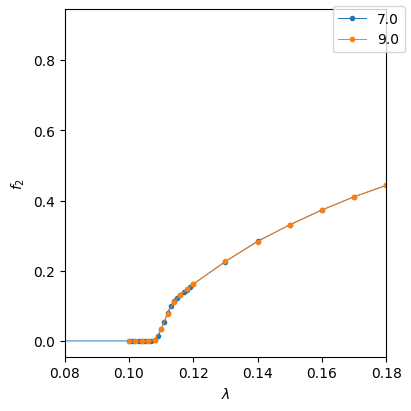

In [11]:
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
Nsites = 2
q1s, q2 = [7.0, 9.0], 10.0
pi1, pi2 = 0.0, 0.0
N = 1000
for q1 in q1s:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    ax.plot(df['l'], df['f2'], label=f'{q1}', lw=0.7, marker='.')
fig.legend()
ax.set_xlim(0.08, 0.18)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_2$')

### System size N=1000, varying the number of sites, q1,...,qk-1 = 7.0, qk = 10, pis=0.0

Text(0, 0.5, '$f_k$')

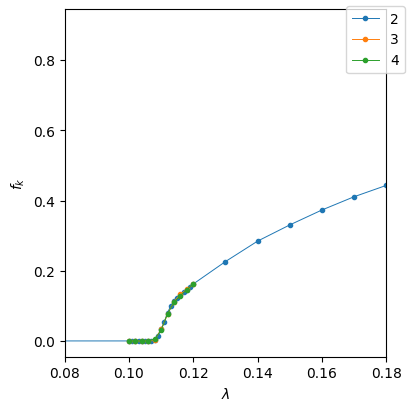

In [17]:
Nsitess = [2,3,4]
N = 1000
qk = 10.0
qlow = 7.0
pi = 0.0

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
for Nsites in Nsitess:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    query = 'N == @N & '
    for i in range(1,Nsites):
        query += f'q{i} == @qlow & pi{i} == @pi & '
    query += f'q{Nsites} == @qk & pi{Nsites} == @pi'
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=f'{Nsites}', lw=0.7, marker='.')
fig.legend()
ax.set_xlim(0.08, 0.18)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_k$')

In [9]:
# df = df.query('l >= 0.1 & l <= 0.2')
df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
q1 = 9.0
# df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
df = df.query('N == @N')

### Proportion of agents on the best site, increasing N, q_low = 7, q_high = 10, pis = 0.1

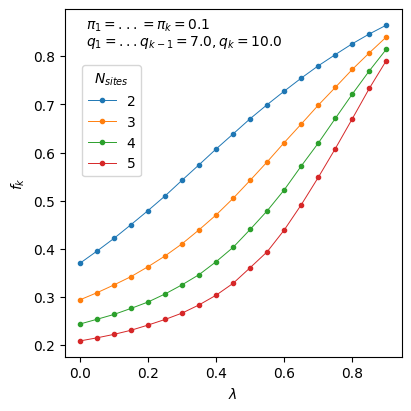

In [14]:
pi = 0.1
qlow = 7.0
qk = 10.0
Nsitess = [2,3,4,5]
N = 1000

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

for Nsites in Nsitess:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    query = 'N == @N & '
    for i in range(1,Nsites):
        query += f'q{i} == @qlow & pi{i} == @pi & '
    query += f'q{Nsites} == @qk & pi{Nsites} == @pi'
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=f'{Nsites}', lw=0.7, marker='.')
fig.legend(loc=(0.2,0.57), title = r'$N_{sites}$')
fig.text(0.2,0.94, rf'$\pi_1 = ... = \pi_k = {pi}$')
fig.text(0.2,0.90, rf'$q_1 = ... = q_{{k-1}} = {qlow}, q_k = {qk}$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_k$')
fig.savefig('1.png')

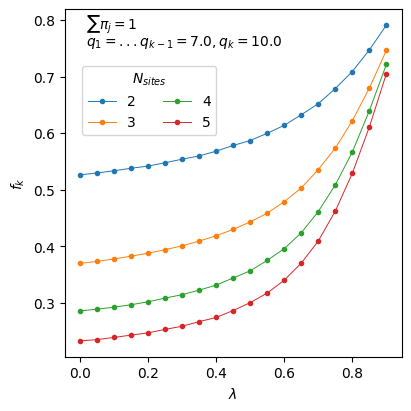

In [13]:
qlow = 7.0
qk = 10.0
Nsitess = [2,3,4,5]
pis = [0.5, 0.33, 0.25, 0.2]
N = 1000

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)

for Nsites,pi in zip(Nsitess,pis):
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    query = 'N == @N & '
    for i in range(1,Nsites):
        query += f'q{i} == @qlow & pi{i} == @pi & '
    query += f'q{Nsites} == @qk & pi{Nsites} == @pi'
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=f'{Nsites}', lw=0.7, marker='.')
fig.legend(loc=(0.2,0.67), ncol=2, title = r'$N_{sites}$')
fig.text(0.2,0.94, rf'$\sum \pi_j = 1$')
fig.text(0.2,0.90, rf'$q_1 = ... q_{{k-1}} = {qlow}, q_k = {qk}$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_k$')
fig.savefig('2.png')